<a href="https://colab.research.google.com/github/madmonkey7/CYSE690---Team3/blob/main/Phishing_mail_Detection_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary libraries
import os
import pandas as pd
import numpy as np
import nltk
import re

In [ ]:
#reading the dataset
df = pd.read_csv("Phishing_Email.csv")



In [ ]:
#print the dataset
df

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...,...
18645,18646,date a lonely housewife always wanted to date ...,Phishing Email
18646,18647,request submitted : access request for anita ....,Safe Email
18647,18648,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18648,18649,press clippings - letter on californian utilit...,Safe Email


In [ ]:
#Extracting relevant columns
selected_columns = ['Email Text', 'Email Type']
new_df = df[selected_columns].copy()

In [ ]:
new_df

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...
18645,date a lonely housewife always wanted to date ...,Phishing Email
18646,request submitted : access request for anita ....,Safe Email
18647,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18648,press clippings - letter on californian utilit...,Safe Email


In [ ]:
#drop rows with missing values
df_cleaned = new_df.dropna()
df_cleaned

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...
18645,date a lonely housewife always wanted to date ...,Phishing Email
18646,request submitted : access request for anita ....,Safe Email
18647,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18648,press clippings - letter on californian utilit...,Safe Email


In [ ]:
#printing the first 500 rows
df_cleaned.head(500)

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...
497,re : hiring practices for summer interns charl...,Safe Email
498,"re : koch three rivers , # 6722 aimee , please...",Safe Email
499,"> ""Around the world, there is a growing sense ...",Safe Email
500,Unsubscribe:Please send a blank mail to:unsub...,Phishing Email


In [ ]:
#Removing null values from the Email Type column
new_df = new_df[(new_df['Email Type'] == 'Safe Email') | (new_df['Email Type'] == 'Phishing Email')]
new_df

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...
18645,date a lonely housewife always wanted to date ...,Phishing Email
18646,request submitted : access request for anita ....,Safe Email
18647,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18648,press clippings - letter on californian utilit...,Safe Email


In [ ]:
#counting the number of emails
new_df["Email Type"].value_counts()

Safe Email        11322
Phishing Email     7328
Name: Email Type, dtype: int64

In [ ]:
#printing stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
stop_words.append("n")
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#converting the datatype of Email Text to string
new_df['Email Text'] = new_df['Email Text'].astype(str)

In [ ]:
#converting the text to lower case
new_df['Email Text'] = new_df['Email Text'].apply(lambda x: ' '.join([word.lower() for word in x.split()]))
new_df

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,hello i am your hot lil horny toy. i am the on...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...
18645,date a lonely housewife always wanted to date ...,Phishing Email
18646,request submitted : access request for anita ....,Safe Email
18647,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18648,press clippings - letter on californian utilit...,Safe Email


In [ ]:
#Replacing any non-alphanumeric characters and any numerics with a single space
for item in new_df["Email Text"]:
    res = re.sub(pattern = "[\W]", repl = " ",string= item)
    res1= re.sub(pattern = "\d", repl = " ",string= res)
    single_space = " ".join(res1.split())
    new_df["Email Text"] = new_df["Email Text"].replace(item, single_space)

In [ ]:
new_df

,Email Text,Email Type
0,re disc uniformitarianism re sex lang dick hud...,Safe Email
1,the other side of galicismos galicismo is a sp...,Safe Email
2,re equistar deal tickets are you still availab...,Safe Email
3,hello i am your hot lil horny toy i am the one...,Phishing Email
4,software at incredibly low prices lower draper...,Phishing Email
...,...,...
18645,date a lonely housewife always wanted to date ...,Phishing Email
18646,request submitted access request for anita dup...,Safe Email
18647,re important prc mtg hi dorn john as you disco...,Safe Email
18648,press clippings letter on californian utilitie...,Safe Email


In [ ]:
#reading the content of email 1
new_df["Email Text"][1]

'the other side of galicismos galicismo is a spanish term which names the improper introduction of french words which are spanish sounding and thus very deceptive to the ear galicismo is often considered to be a barbarismo what would be the term which designates the opposite phenomenon that is unlawful words of spanish origin which may have crept into french can someone provide examples thank you joseph m kozono kozonoj gunet georgetown edu'

In [ ]:
#removing the stop words
new_df['Email Text'] = new_df['Email Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
#reading the content of email 1 after removing the stop words
new_df["Email Text"][1]

'side galicismos galicismo spanish term names improper introduction french words spanish sounding thus deceptive ear galicismo often considered barbarismo would term designates opposite phenomenon unlawful words spanish origin may crept french someone provide examples thank joseph kozono kozonoj gunet georgetown edu'

In [ ]:
#importing necessary modules for stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
# Function to stem text using NLTK's PorterStemmer
stemmer = PorterStemmer()
def stem_text(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

In [ ]:
# Apply the stem_text function to the 'Email Text' column and store the result in the 'stemmed_text' column
import nltk
nltk.download('punkt')
new_df['stemmed_text'] = new_df['Email Text'].apply(stem_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
new_df

,Email Text,Email Type,stemmed_text
0,disc uniformitarianism sex lang dick hudson ob...,Safe Email,disc uniformitarian sex lang dick hudson obser...
1,side galicismos galicismo spanish term names i...,Safe Email,side galicismo galicismo spanish term name imp...
2,equistar deal tickets still available assist r...,Safe Email,equistar deal ticket still avail assist robert...
3,hello hot lil horny toy one dream open minded ...,Phishing Email,hello hot lil horni toy one dream open mind pe...
4,software incredibly low prices lower drapery s...,Phishing Email,softwar incred low price lower draperi sevente...
...,...,...,...
18645,date lonely housewife always wanted date lonel...,Phishing Email,date lone housewif alway want date lone housew...
18646,request submitted access request anita dupont ...,Safe Email,request submit access request anita dupont enr...
18647,important prc mtg hi dorn john discovered rece...,Safe Email,import prc mtg hi dorn john discov recent stil...
18648,press clippings letter californian utilities p...,Safe Email,press clip letter californian util pleas find ...


In [ ]:
# Tokenize the 'stemmed_text' column and store the result in the 'tokens' column
new_df['tokens'] = new_df['stemmed_text'].apply(word_tokenize)

In [ ]:
new_df

,Email Text,Email Type,stemmed_text,tokens
0,disc uniformitarianism sex lang dick hudson ob...,Safe Email,disc uniformitarian sex lang dick hudson obser...,"[disc, uniformitarian, sex, lang, dick, hudson..."
1,side galicismos galicismo spanish term names i...,Safe Email,side galicismo galicismo spanish term name imp...,"[side, galicismo, galicismo, spanish, term, na..."
2,equistar deal tickets still available assist r...,Safe Email,equistar deal ticket still avail assist robert...,"[equistar, deal, ticket, still, avail, assist,..."
3,hello hot lil horny toy one dream open minded ...,Phishing Email,hello hot lil horni toy one dream open mind pe...,"[hello, hot, lil, horni, toy, one, dream, open..."
4,software incredibly low prices lower drapery s...,Phishing Email,softwar incred low price lower draperi sevente...,"[softwar, incred, low, price, lower, draperi, ..."
...,...,...,...,...
18645,date lonely housewife always wanted date lonel...,Phishing Email,date lone housewif alway want date lone housew...,"[date, lone, housewif, alway, want, date, lone..."
18646,request submitted access request anita dupont ...,Safe Email,request submit access request anita dupont enr...,"[request, submit, access, request, anita, dupo..."
18647,important prc mtg hi dorn john discovered rece...,Safe Email,import prc mtg hi dorn john discov recent stil...,"[import, prc, mtg, hi, dorn, john, discov, rec..."
18648,press clippings letter californian utilities p...,Safe Email,press clip letter californian util pleas find ...,"[press, clip, letter, californian, util, pleas..."


In [ ]:
new_df.to_csv('cleaned.csv')

In [ ]:
#import packages for feature extraction
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
#fill missing values
df['Email Text'] = df['Email Text'].fillna('')
# Use tokenized text and prepare data for training Doc2Vec model: create TaggedDocument objects, each representing an email with tokenized text ('words') and a unique identifier ('tags').
tagged_data = [TaggedDocument(words=words.split(), tags=[str(i)]) for i, words in enumerate(df['Email Text'])]

In [ ]:
# Initialize and train the Doc2Vec model
model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=10)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
#Extract document vectors from the trained Doc2Vec model for each email represented in the TaggedDocument list.
doc_vectors = [model.dv[idx] for idx in range(len(tagged_data))]

In [ ]:
doc_vectors

[array([-0.24278733,  0.60505986, -0.9065602 ,  0.0131969 ,  0.15803263,
        -0.1423176 ,  0.9840676 ,  0.48414803, -0.2074178 ,  0.28609627,
        -0.41599044, -0.15002619, -0.06977621, -0.5206632 , -0.28237164,
         0.2554452 , -0.1615749 ,  0.08344106,  0.06714534,  0.1620986 ,
        -0.254815  ,  0.7660877 , -0.53515434,  0.17619605,  0.1565649 ,
         0.14246626, -0.25941035, -0.49027815,  0.2979291 ,  0.30690134,
        -0.11325609,  0.29097784,  0.15308717, -0.35780144, -0.11940516,
         0.71369284, -0.15999703, -0.09684217, -0.3075664 , -0.05986128,
        -0.24682622, -0.04186387,  0.01530051, -0.36324114,  0.9135259 ,
         0.4855982 ,  0.3513746 , -0.0526654 ,  0.71986634, -0.15158504,
        -0.4235844 , -0.53363043, -0.35838348, -0.17466468, -0.03787023,
         0.06061905, -0.03005669,  0.36814815, -0.00822362, -0.45100614,
        -0.83120537,  0.23386697,  0.21816953,  0.28029183, -0.10618683,
         0.7411415 , -0.3409078 ,  0.16844013,  0.2

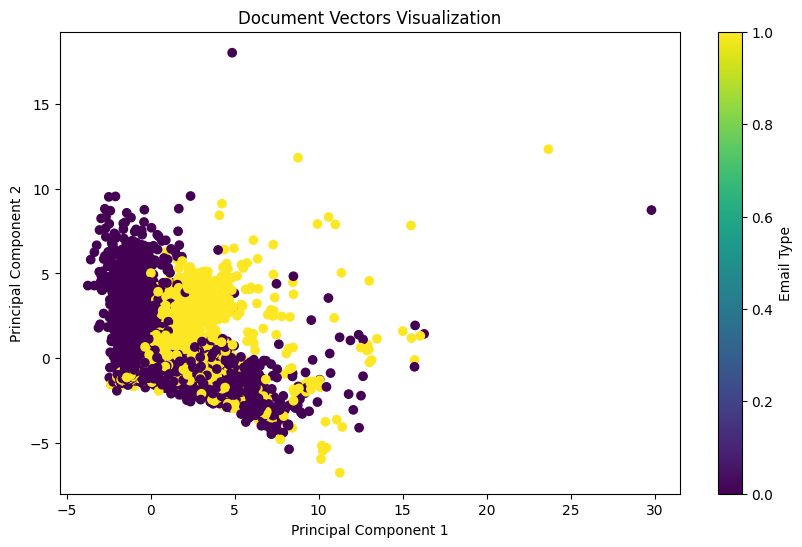

In [ ]:
#Reduce dimensionality of document vectors to 2D using PCA and visualize them in a scatter plot.
#Points are colored based on email type (Safe: 0, Phishing: 1).
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Get document vectors
doc_vectors = [model.dv[idx] for idx in range(len(tagged_data))]

# Reduce dimensionality to 2D
pca = PCA(n_components=2)
doc_vectors_2d = pca.fit_transform(doc_vectors)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(doc_vectors_2d[:, 0], doc_vectors_2d[:, 1], c=[0 if 'Safe' in tag else 1 for tag in df['Email Type']], cmap='viridis')
plt.title('Document Vectors Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Email Type')
plt.show()


In [ ]:
# Convert doc_vectors to numpy array
doc_vectors_np = np.array(doc_vectors)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(doc_vectors_np,df['Email Type'], test_size=0.2, random_state=42)


In [ ]:
# Convert labels to binary (0.0: Safe Email, 1.0: Phishing Email)
y_train = np.array([1.0 if label == 'Phishing Email' else 0.0 for label in y_train])
y_test = np.array([1.0 if label == 'Phishing Email' else 0.0 for label in y_test])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the Doc2Vec vectors
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [ ]:
#Implementing LSTM
import tensorflow as tf
from keras.layers import Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping

max_features = 1000
max_len = 100
embedding_dim = 128
model = Sequential()
model.add(Embedding(input_dim = max_features, output_dim = embedding_dim, input_length = max_len))
# model.add(SpatialDropout1D(0.2))
model.add(LSTM(units = 100, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = 'sigmoid'))

# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])



In [ ]:
# Training
epochs = 5
batch_size = 128
early_stop = EarlyStopping(monitor = 'val_loss', patience = 3, verbose = 1)
history = model.fit( X_train_normalized, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_normalized, y_test), callbacks=[early_stop])

# Evaluation
loss, accuracy = model.evaluate(X_test_normalized, y_test)
print("Loss: {:.4f}, Accuracy: {:.4f}".format(loss, accuracy))



Epoch 1/5


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 100), found shape=(None, 1, 100)
